#Проектная работа модуля "Анализ бизнес-показателей"
#Тема проекта "Аналитика в Яндекс.Афише"

Цель проекта: найти пути оптимизации маркетингового бюджета (скоращение затрат)\
Задачи проекта:
1. определить структуру маркетинговых затрат (затраты на одного пользователя и срок окупаемости затрат)
2. определить источники экономии (источники сокращения затрат или источники роста выручки)
3. сфомрировать рекомендации

План работы с проектом:
1. подготовка данных к анализу: загрузка, оптимизация, проверка типа данных
2. расчет показатель характеризующих структуру затрат маркетингового бджета
3. визуализация результатов
4. формирование выводов и рекомендаций.

Инструменты реализации.
Библиотека Pandas, Numpy, библиотеки визуализации данных


Этап 1.
подготовка данных к анализу
загрузим данные, проверим тип данных и изменим его при необходимости


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
visits = pd.read_csv('/datasets/visits_log.csv')
visits.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


дата фрейм visits
для подготовки данных необходимs переименование столбцов, перевод столбцов, содержащих данные о датах в формат даты и времени из строкового.
добавим столбцы с индикаторами периода времени - день, неделя, месяц, год

In [2]:
visits.set_axis(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], axis = "columns", inplace = True)
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [3]:
visits['start_ts'] = visits['start_ts'].astype('datetime64')
visits['end_ts'] = visits['end_ts'].astype('datetime64')
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits['session_period'] = visits['start_ts'].astype('datetime64[M]')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 10 columns):
device            359400 non-null object
end_ts            359400 non-null datetime64[ns]
source_id         359400 non-null int64
start_ts          359400 non-null datetime64[ns]
uid               359400 non-null uint64
session_year      359400 non-null int64
session_month     359400 non-null int64
session_week      359400 non-null int64
session_date      359400 non-null object
session_period    359400 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(4), object(2), uint64(1)
memory usage: 27.4+ MB


In [4]:
visits.head(10)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_period
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,2017-09-01
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,5,2018-01-30,2018-01-01
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,11,44,2017-11-05,2017-11-01
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017,7,29,2017-07-19,2017-07-01
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017,11,45,2017-11-08,2017-11-01


In [5]:
#проверим, что в данных охвачен корректный период для анализа, соответствющий условию задачи
visits['session_period'].value_counts()

2017-11-01    43969
2017-12-01    41983
2017-10-01    37903
2018-02-01    37182
2018-01-01    36939
2018-03-01    35679
2018-05-01    26635
2018-04-01    26515
2017-09-01    23907
2017-07-01    17828
2017-06-01    16505
2017-08-01    14355
Name: session_period, dtype: int64

In [6]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


дата фрейм orders:для подготовки данных необходимо переименование столбцов,перевод столбцов, содержащих данные о датах в формат даты и времени из строкового.


In [7]:
orders.set_axis(['buy_ts', 'revenue', 'uid'], axis = "columns", inplace = True)
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [8]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [9]:
orders.head(10)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [10]:
#проверим, что в данных охвачен корректный период для анализа, соответствющий условию задачи
#видим данные за 01 июнь 2018 года (за один день), что не соотвествует условию задания - исключим их
orders['buy_ts'].astype('datetime64[M]').value_counts()

2017-12-01    6218
2017-10-01    5679
2017-11-01    5659
2018-03-01    5326
2018-02-01    5281
2018-01-01    4721
2018-05-01    4346
2017-09-01    3387
2018-04-01    3273
2017-07-01    2363
2017-06-01    2354
2017-08-01    1807
2018-06-01       1
Name: buy_ts, dtype: int64

In [11]:
orders = orders[orders['buy_ts']< "2018-06-01 00:00:00"]

In [12]:
#проверим
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 3 columns):
buy_ts     50414 non-null datetime64[ns]
revenue    50414 non-null float64
uid        50414 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB


In [13]:
orders.head(10)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [14]:
orders['buy_ts'].astype('datetime64[M]').value_counts()

2017-12-01    6218
2017-10-01    5679
2017-11-01    5659
2018-03-01    5326
2018-02-01    5281
2018-01-01    4721
2018-05-01    4346
2017-09-01    3387
2018-04-01    3273
2017-07-01    2363
2017-06-01    2354
2017-08-01    1807
Name: buy_ts, dtype: int64

In [15]:
costs = pd.read_csv('/datasets/costs.csv')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


дата фрейм costs: для подготовки данных необходим перевод столбцов, содержащих данные о датах в формат даты и времени из строкового

In [16]:
#сделаем допущение, что все рекламные затраты в конкретный день пошли на привлечение новых пользователей,
#и в соответствии с этим, переименуем колонку с датой в колонку с датой покупки (приобретения)
#(acquisition приобретение)

costs.set_axis(['source_id','acquisition_date', 'costs'], axis = "columns", inplace = True)
costs.columns

Index(['source_id', 'acquisition_date', 'costs'], dtype='object')

In [17]:
costs['acquisition_date'] = costs['acquisition_date'].astype('datetime64')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id           2542 non-null int64
acquisition_date    2542 non-null datetime64[ns]
costs               2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> Здесь всё хорошо

Данные подготовлены к анализу.
Проведем анализ по трем блокам:
1. продукт;
Продукт
Сколько людей пользуются в день, неделю, месяц?
Сколько сессий в день?
Сколько длится одна сессия?
Как часто люди возвращаются?
2. продажи;
Продажи
Когда люди начинают покупать?
Сколько раз покупают за период?
Какой средний чек?
Сколько денег приносят? (LTV)
3. маркетинг.
Маркетинг
Сколько денег потратили? Всего / на каждый источник / по времени
Сколько стоило привлечение одного покупателя из каждого источника (CAC)?
На сколько окупились расходы? (ROI)

Часть 1. нализируем метрики по блоку "Продукт"

1. Сколько людей пользуются в день, неделю, месяц?
2. Сколько сессий в день?
3. Сколько длится одна сессия?
4. Как часто люди возвращаются?

#Проведем анализ пользовательской активности
А именно - рассчитыаем метрики, показывающие,сколько людей пользуются в день, неделю, месяц (в целом, по источникам трафика и по видам устройств)?
На активных пользователей смотрят в трёх измерениях:
DAU (от англ. daily active users) — количество уникальных пользователей в день;
WAU (от англ. weekly active users) — количество уникальных пользователей в неделю;
MAU (от англ. monthly active users) — количество уникальных пользователей в месяц.


Скалькулируем эти показатели в целом.

In [18]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [19]:
print("Количество уникальных пользователей в день {}".format(int(dau_total)))
print("Количество уникальных пользователей в неделю {}".format(int(wau_total)))
print("Количество уникальных пользователей в месяц {}".format(int(mau_total)))


Количество уникальных пользователей в день 907
Количество уникальных пользователей в неделю 5716
Количество уникальных пользователей в месяц 23228


В среднем, неплохие показатели числа активных пользователей за день, неделю и месяц.


Изучим динамику числа уникальных пользователей в разбивке по месяцам.

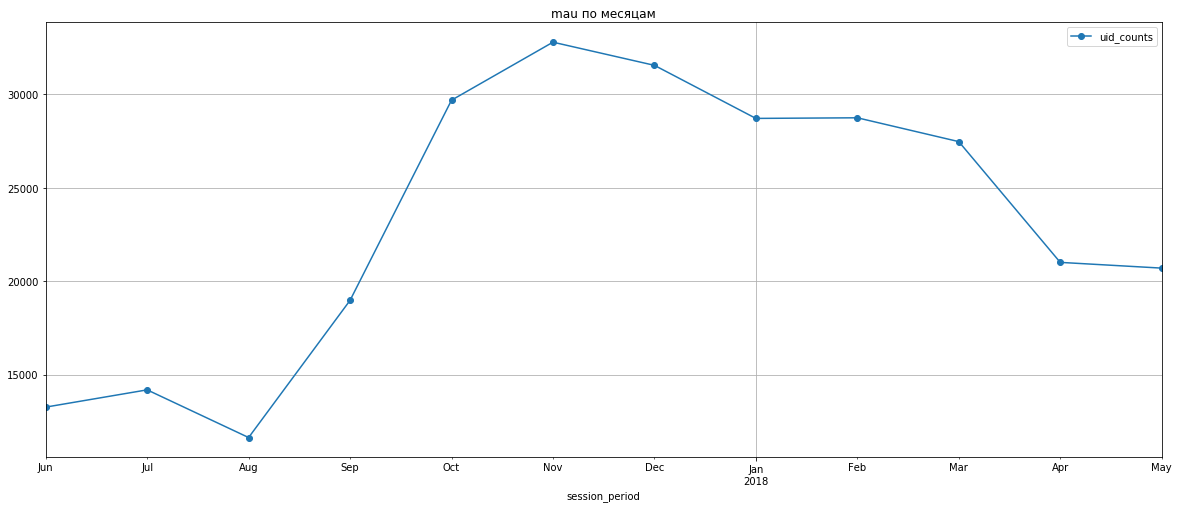

In [20]:
mau_total_monthly = visits.groupby(['session_period']).agg({'uid': 'nunique'}).rename(columns={'uid':'uid_counts'})\
                          .plot(grid=True, figsize=(20,8),style='o-', title='mau по месяцам')

исследуя график распределения количества уникальных пользователей по периодам, можно сделать следующие выводы:
1. наблюдается ярко выраженная сезонность в использовании продукта: зимой больше пользователей, летом меньше.
Данный вывод имеет логическое обоснование - в целом, летом люди меньше время проводят в помещениях, в разгаре дачный сезон и отпуска.
Закрытие театрального сезона
2. в ноябре 2017 года было зафиксировано наибольшее количество уникальных пользователей

Изучим динамику числа уникальных пользователей в разбивке по источникам трафика.

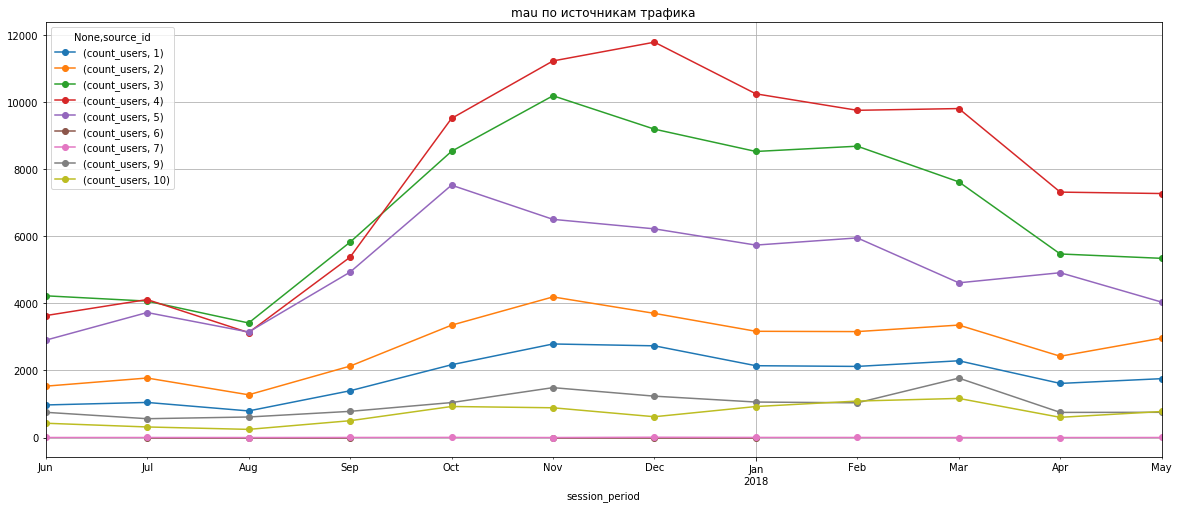

In [21]:
mau_total_source = visits.groupby(['session_period','source_id']).agg({'uid': 'nunique'}).reset_index()
mau_total_source.columns = ['session_period','source_id','count_users']
mau_total_source.pivot_table(index=['session_period'],columns='source_id')\
.plot(grid=True, figsize=(20,8),title='mau по источникам трафика',style='o-')


исследуя график распределения количества уникальных пользователей по источникам трафика, можно сделать следующие выводы:
1. наблюдается ярко выраженная сезонность в использовании продукта по всем источникам трафика (кроме 7, данные по которому кажутся эпизодическими-возможно, тестировали новый источник трафика в одном из периодов): зимой больше пользователей, летом меньше.

2. больше всего посещений из 4 и 3 источников трафика


Изучим динамику числа уникальных пользователей в разбивке по типам устройств.

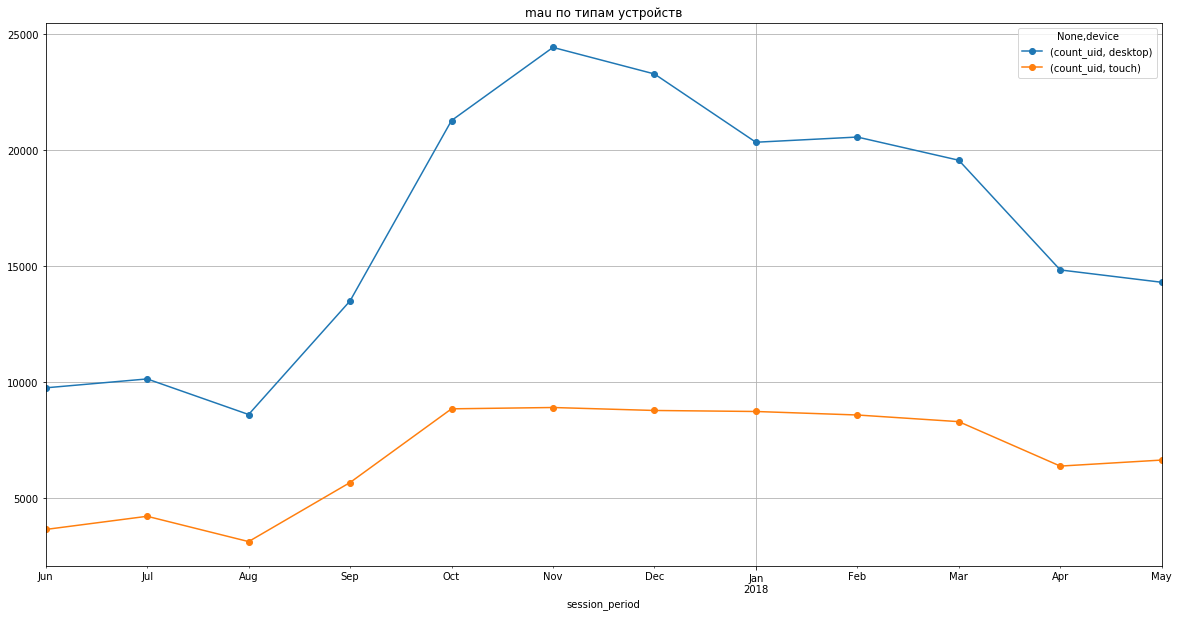

In [22]:
mau_total_device = visits.groupby(['session_period','device']).agg({'uid': 'nunique'}).reset_index()
mau_total_device.columns = ['session_period','device','count_uid']
mau_total_device.pivot_table(index=['session_period'],columns='device')\
                .plot(grid=True, figsize=(20,10),title='mau по типам устройств', style='o-')



по количеству посещений, очевидно, ледируют десктопные пользователи,сезонность так же ярко выражена

<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> Верный результат + наглядный графики

Подсчитаем количество пользовательских сессий в динамике (по дням) и общий показатель по выборке.

In [23]:
sessions_per_day = visits.groupby('session_period').agg({'start_ts':'count'}).rename(columns={'start_ts':'sessions_counts'})
                                          

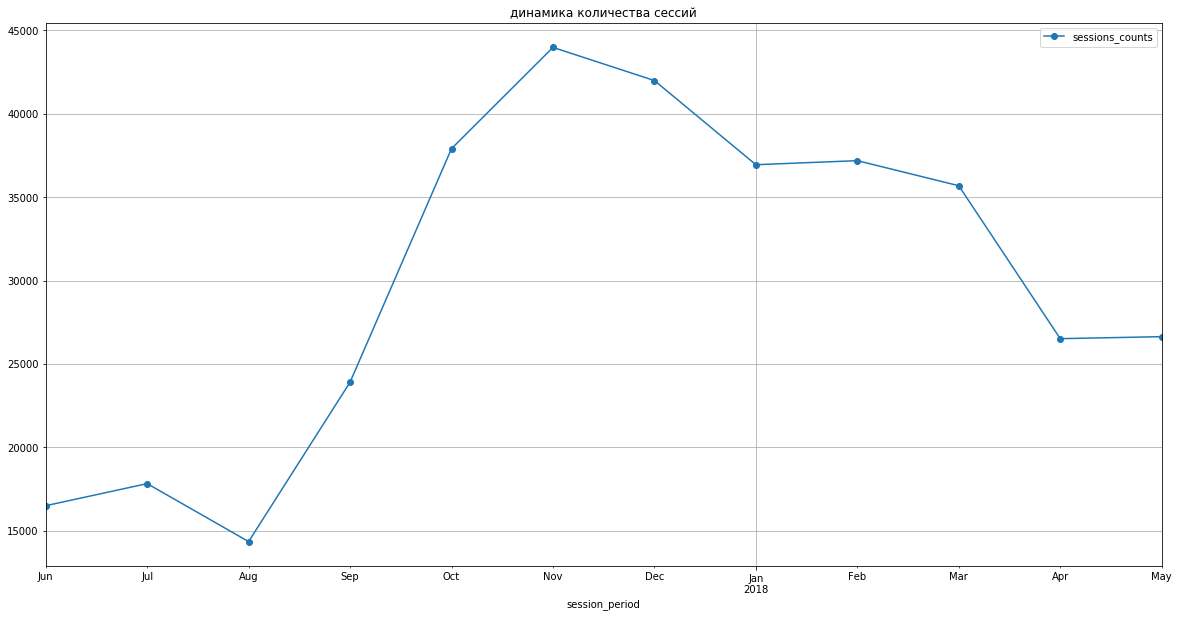

In [24]:
sessions_per_day.plot(grid=True, figsize=(20,10),title='динамика количества сессий', style='o-')

In [25]:
print("Среднее количество сессий в день {}".format(int(sessions_per_day['sessions_counts'].mean())))


Среднее количество сессий в день 29950


динамика количества сессий аналогична показателям количества уникальных пользоваиелей - в ноябре 2017 года было зафиксировано наибольшее количество пользовательских сессий

Подсчитаем количество пользовательских сессий в динамике (по дням) по источникам трафика и устройствам

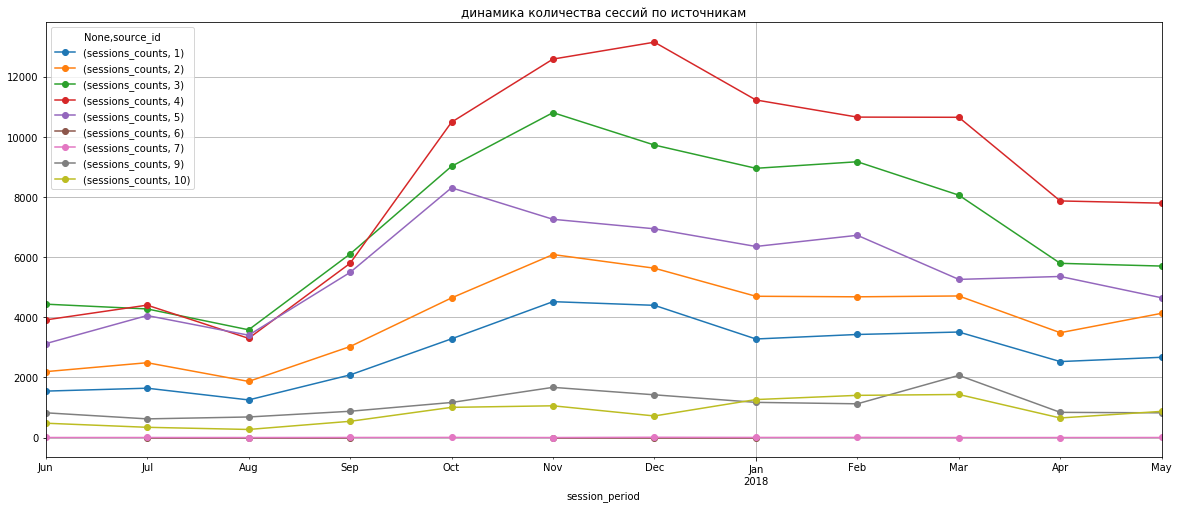

In [26]:
sessions_per_day_source = visits.groupby(['session_period','source_id']).agg({'start_ts':'count'}).reset_index()
sessions_per_day_source.columns = ['session_period','source_id','sessions_counts']
sessions_per_day_source.pivot_table(index=['session_period'],columns='source_id')\
.plot(grid=True, figsize=(20,8),title='динамика количества сессий по источникам',style='o-')

больше всего сессий по источникам трафика 4 и 3 аналогично количеству уникальных пользователей

In [27]:
sessions_per_day_source.pivot_table(index=['source_id'], aggfunc = 'mean').sort_values(by = 'sessions_counts', ascending=False).astype('int')


,sessions_counts
source_id,
4,8482
3,7134
5,5575
2,3968
1,2843
9,1106
10,835
7,3
6,1


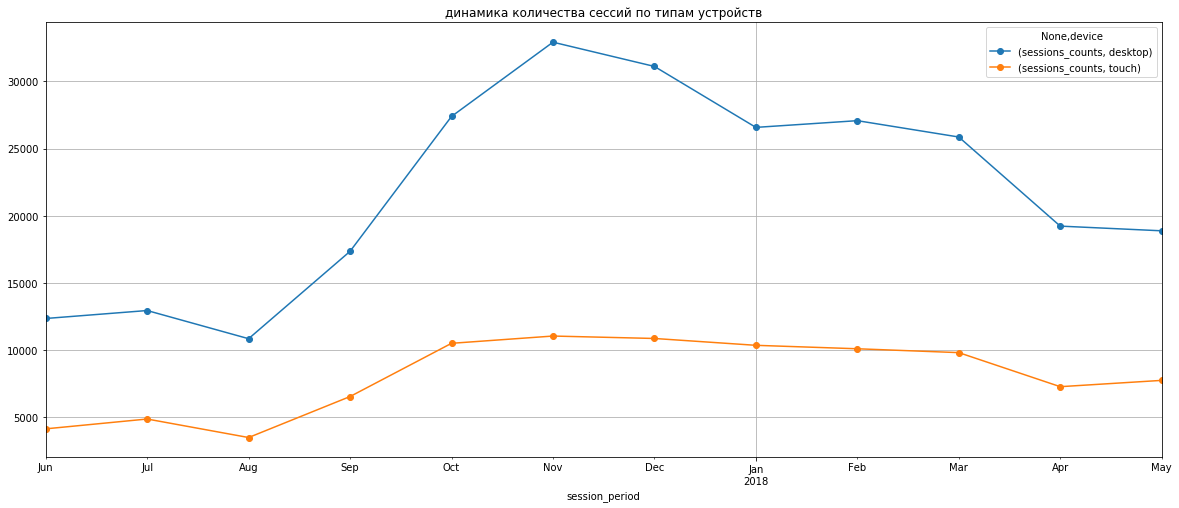

In [28]:
sessions_per_day_device = visits.groupby(['session_period','device']).agg({'start_ts':'count'}).reset_index()
sessions_per_day_device.columns = ['session_period','device','sessions_counts']
sessions_per_day_device.pivot_table(index=['session_period'],columns='device')\
.plot(grid=True, figsize=(20,8),title='динамика количества сессий по типам устройств',style='o-')

количество сессий пользователей, заходящих с компьютеров значительно выше аналогичного показателя пользователей мобильных устройств

In [29]:
sessions_per_day_device.pivot_table(index=['device'], aggfunc = 'mean').sort_values(by = 'sessions_counts', ascending=False).astype('int')


,sessions_counts
device,
desktop,21880
touch,8069


Посчитаем сколько длится одна сессия (или ASL)

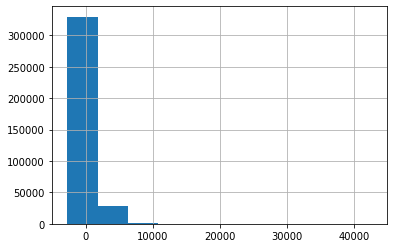

In [30]:
visits['duration_ts'] = (visits['end_ts'] - visits['start_ts'])/np.timedelta64(1,'s')
visits['duration_ts'].hist(bins=10)

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Распределение времени продолжительности сессии — не из таких, считаем моду.

In [31]:
duration_ts_mode = visits['duration_ts'].mode()
print("Самая распространенная продолжительность сессии {}".format(int(duration_ts_mode)))

Самая распространенная продолжительность сессии 60


In [32]:
duration_ts_mean = visits['duration_ts'].mean()
print("Средняя продолжительность сессии {}".format(int(duration_ts_mean)))

Средняя продолжительность сессии 643


Отрицательные значения-ошибка в данных.

Подсчитаем продолжительность сессий в  по источникам трафика и устройствам

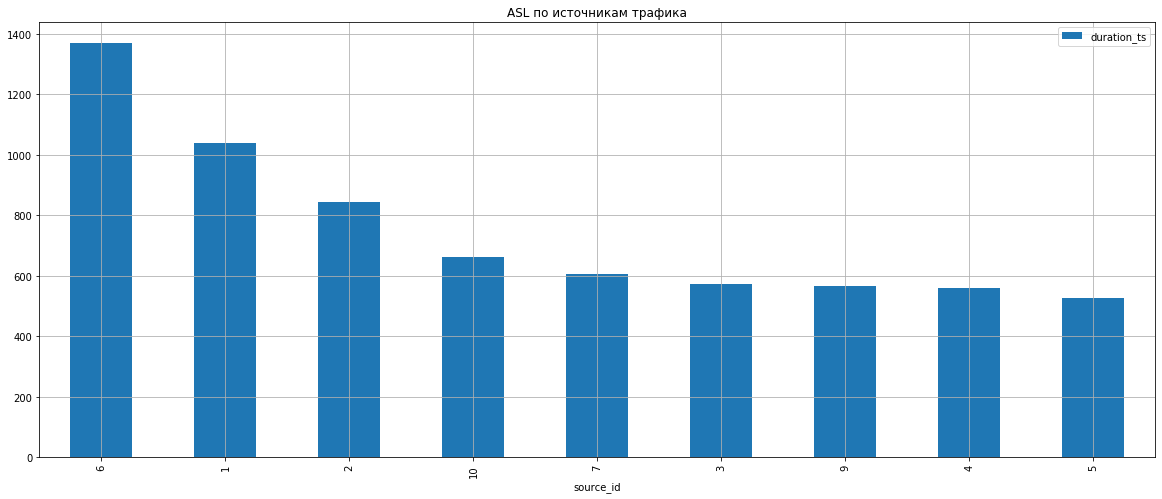

In [33]:
visits_source = visits.pivot_table(index=['source_id'],\
                                                                          values='duration_ts', aggfunc = 'mean')\
                .sort_values(by = 'duration_ts', ascending=False).astype('int')
visits_source.plot(kind="bar", grid=True, figsize=(20,8),title='ASL по источникам трафика',style='o-')


средняя продолжительность сессии максимальна для 6-го источника трафика, 3 и 4 источники трафика показывают средню продолжительность сессии ниже, чем средняя по всей выборке

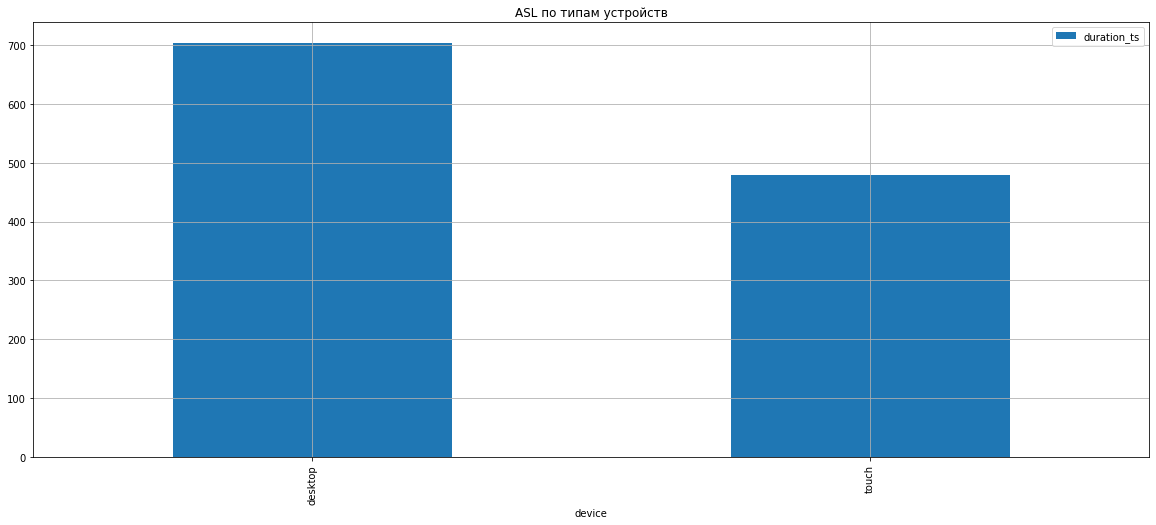

In [34]:
visits_device = visits.pivot_table(index=['device'], values='duration_ts', aggfunc = 'mean')\
                .sort_values(by = 'duration_ts', ascending=False).astype('int')
visits_device.plot(kind="bar", grid=True, figsize=(20,8),title='ASL по типам устройств',style='o-')

средняя продолжительсность сессии десктопных пользователей длинее, чем пользователей, заходящих с мобильных устройств

<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> Хороший разбор. Молодец

Как часто люди возвращаются. 
Чтобы оценить, как часто люди возвращаются, необходимо посчитать Retention Rate. 
Для этого необходимо:
1. разбить пользователей на кагорты
2. определить время жизни кагорты
3.построить тепловые карты

разделим пользователей на когорты
критерием отнесения в кагорту будет период, в котором совершена первая пользовательская сессия
периодом зададим месяц:это наиболее универсальный показателю промежутка времени, понятный всем, и оптимальный для платформы Яндекс.Афиша, которой мало кто пользуется часто-раз или два в неделю

In [35]:
first_session_date = visits.groupby(['uid'])['session_date'].min()

first_session_date.name = 'first_session_date'

visits_cohort = visits.join(first_session_date,on='uid')

visits_cohort['first_activity_month'] = visits_cohort['first_session_date'].astype('datetime64[M]')

visits_cohort['cohort_lifetime'] = visits_cohort['session_period'] - visits_cohort['first_activity_month']

visits_cohort['cohort_lifetime'] = visits_cohort['cohort_lifetime'] / np.timedelta64(1,'M')

visits_cohort['cohort_lifetime'] = visits_cohort['cohort_lifetime'].round().astype('int')


сформируем кагорты по времени жизни - количеству месяцев между месяцем первой активности и последним месяцем за исследуемый период

In [36]:

cohorts=visits_cohort.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']] #число пользователей на нулевой месяц lifetime
initial_users_count =initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
cohorts['retention']= cohorts['uid'] /cohorts['cohort_users']
cohorts=cohorts[cohorts['cohort_lifetime'] > 0]
retention_pivot =cohorts.pivot_table(index='first_activity_month', columns=['cohort_lifetime'], values='retention',aggfunc ='sum')
retention_pivot


cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,
2017-06-01,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


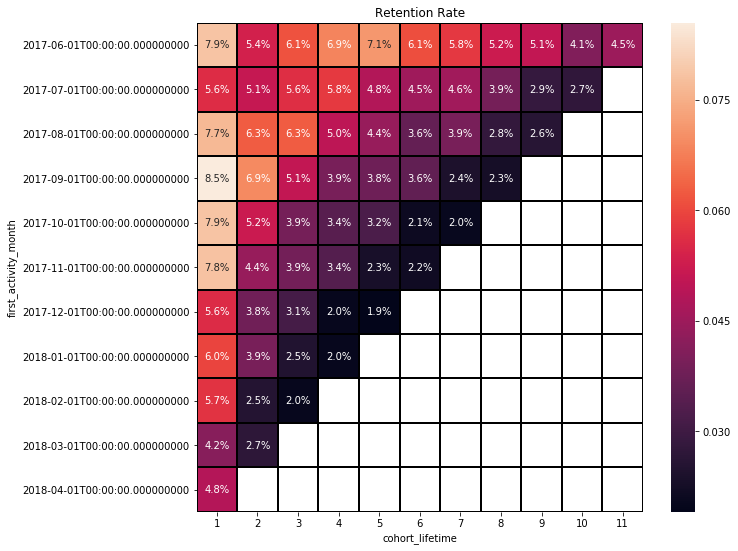

In [37]:
#визуализируем тепловую карту
# на предыдущем шаге исключили из анализа первый месяц, чтобы визуализация была более наглядной
#т.к. в первый месяц Retention Rate = 100%, все остальные будут окрашены в черный цвет
plt.figure(figsize=(10, 9)) 
plt.title('Retention Rate') 
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='black')

самая лояльная кагорта -кагорта с датой первой сессии в июне 2017г., далее по кагортам Retention Rate снижается
можно предположить, что влияет сезонность использования платформы

<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> Всё правильно

выполним аналогичные расчеты по источникам трафика и по устройствам
Кагортами станут источники трафика и устройства

расчеты по источникам трафика
проведем такой анализ только для тех пользователей, которые "дожили" до 6 месяца.
иначе, анализ будет необъективным - так как не все пользователи "дожили" до 6 месяца

In [38]:
cohorts_s=visits_cohort.groupby(['source_id','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count_s = cohorts_s[cohorts_s['cohort_lifetime'] == 0][['source_id','uid']] #число пользователей по каждому источнику трафика
initial_users_count_s =initial_users_count_s.rename(columns={'uid':'cohort_users'})
cohorts_s = cohorts_s.merge(initial_users_count_s, on='source_id')
cohorts_s['retention']= cohorts_s['uid']/cohorts_s['cohort_users']
cohorts_s=cohorts_s[cohorts_s['cohort_lifetime'] > 5]
retention_pivot_s =cohorts_s.pivot_table(index='source_id', columns='cohort_lifetime', values='retention',aggfunc ='sum')


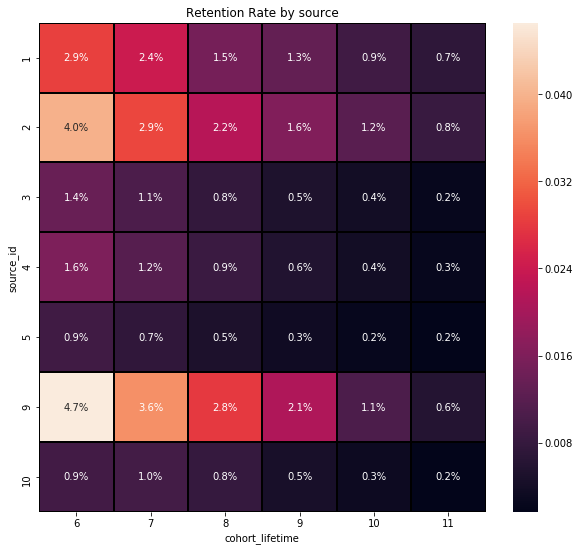

In [39]:
#визуализируем тепловую карту

plt.figure(figsize=(10, 9)) 
plt.title('Retention Rate by source') 
sns.heatmap(retention_pivot_s, annot=True, fmt='.1%', linewidths=1, linecolor='black')

самым стабильным с точки зрения возврата пользователей,источником трафика является 9 источник
самым нестабильным 5


расчеты по типам девайсов

In [40]:
cohorts_d=visits_cohort.groupby(['device','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count_d = cohorts_d[cohorts_d['cohort_lifetime'] == 0][['device','uid']] 
initial_users_count_d =initial_users_count_d.rename(columns={'uid':'cohort_users'})
cohorts_d = cohorts_d.merge(initial_users_count_d, on='device')
cohorts_d['retention']= cohorts_d['uid']/cohorts_d['cohort_users']
cohorts_d=cohorts_d[cohorts_d['cohort_lifetime'] > 5]
retention_pivot_d =cohorts_d.pivot_table(index='device', columns='cohort_lifetime', values='retention',aggfunc ='sum')

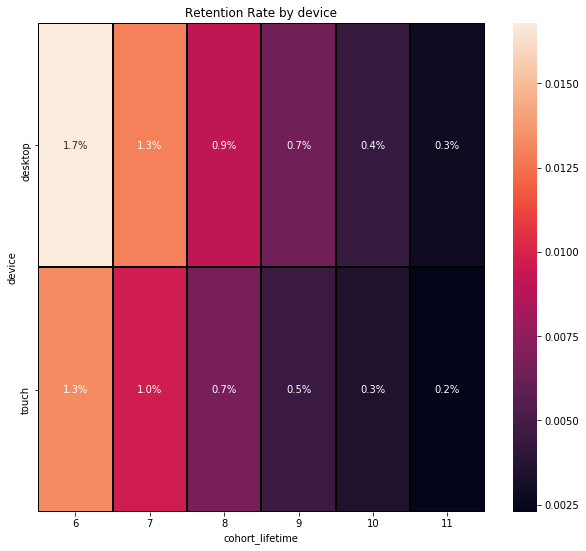

In [41]:
#визуализируем тепловую карту

plt.figure(figsize=(10, 9)) 
plt.title('Retention Rate by device') 
sns.heatmap(retention_pivot_d, annot=True, fmt='.1%', linewidths=1, linecolor='black')

возврат пользователей, которые впервые вошли с компьютера выше, чем пользвателей, вошедших впервые в мобильных устройств

с точки зрения возврата пользователей, самым эффективным является источник трафика 9
с точки зрения устройств - декстопы - стационарные компьютеры и ноутбуки

<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> И здесь всё хорошо

Часть 2. анализируем метрики по блоку 
Продажи
Когда люди начинают покупать?
Сколько раз покупают за период?
Какой средний чек?
Сколько денег приносят? (LTV)

скалькулируем общие метрики, далее перейдем на метрики по источникам трафика и устройствам

для того, чтобы ответить на вопрос, когда люди начинают покупать, найдем сколько времени проходит от начала первой зарегестрированной сессии до первой покупки
# для этого сформируем таблицу из двух дата фреймов - visits и orders
найдем дату первой сессии и первой покупки - разница между ними и будет искомой метрикой

,count,mean,std,min,5%,10%,15%,25%,50%,75%,95%,max
delta,36522.0,24340.842205,67785.583078,0.0,0.0,1.0,2.0,4.0,16.0,2897.5,178409.0,523144.0


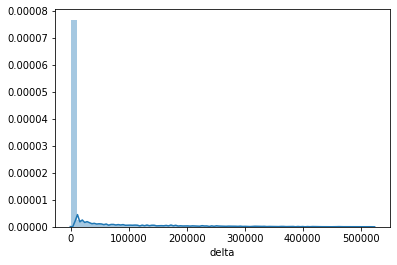

In [42]:
orders_visits = (visits.groupby('uid').agg({'start_ts':'min'})
                                       .join(orders.groupby('uid').agg({'buy_ts':'min'}),how ='right')) 
orders_visits['delta'] = (orders_visits['buy_ts'] - orders_visits['start_ts']).dt.total_seconds() / 60
sns.distplot(orders_visits['delta'])
orders_visits.describe(percentiles = [0.05, 0.1, 0.15,0.25,0.50, 0.75, 0.95]).T


In [43]:
mode = orders_visits['delta'].mode()
print(int(mode))

1


In [44]:
median = orders_visits['delta'].median()
print(int(median))

16


видим много быстрых покупок, которые составляют 10% от всех покупок
среднее время покупки  - 16 минут
самое распространенное  1 минута

посмотрим, когда люди начинают покупать с разбивкой по источникам трафика и типам устройств

<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> Грамотный выбор метрики среднего

Соединим таблицы с визитами и покупками

In [45]:
#строим профили юзеров (acquisition приобретение)

users = (visits.sort_values(by=['uid','start_ts'])
               .groupby('uid')  
               .agg({'start_ts':'first', 'source_id':'first','device':'first'}) #сортировка по первой сессии, источнику трафика и устройству
               .rename(columns = {'start_ts':'acquisitions_ts'}))
first_order_date =orders.groupby('uid')['buy_ts'].min()
first_order_date.name ='first_order_ts'
buyers = users.join(first_order_date, on='uid', how = 'right')


Среднее время с первой сессии до покупки для десктопных пользователей в минутах составляет: 15.0
Среднее время с первой сессии до покупки для пользователей мобильных устройства в минутах составляет: 38.0


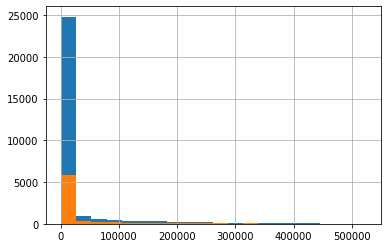

In [46]:
#посмотрим распределение времени между первой сессией и покупкой по типам устройств
buyers_desktop = buyers[buyers['device'] == 'desktop']
buyers_touch = buyers[buyers['device'] == 'touch']

time_to_by_desktop = (buyers_desktop['first_order_ts'] - buyers_desktop['acquisitions_ts']).dt.total_seconds() / 60
time_to_by_touch = (buyers_touch['first_order_ts'] - buyers_touch['acquisitions_ts']).dt.total_seconds() / 60

time_to_by_desktop.hist(bins=20)
time_to_by_touch.hist(bins=20)

print('Среднее время с первой сессии до покупки для десктопных пользователей в минутах составляет:', time_to_by_desktop.median())
print('Среднее время с первой сессии до покупки для пользователей мобильных устройства в минутах составляет:', time_to_by_touch.median())

среднее время между покупкой и первой сессией десктопных пользователей чуть ниже, чем общее по выборке, и значительно ниже, чем у пользователей мобильных устройств

оценим источники трафика

Среднее время с первой сессии до покупки для пользователей источника трафика 2 в минутах составляет: 23.0
Среднее время с первой сессии до покупки для пользователей источника трафика 10 в минутах составляет: 12.0
Среднее время с первой сессии до покупки для пользователей источника трафика 3 в минутах составляет: 19.0
Среднее время с первой сессии до покупки для пользователей источника трафика 5 в минутах составляет: 11.0
Среднее время с первой сессии до покупки для пользователей источника трафика 4 в минутах составляет: 18.0
Среднее время с первой сессии до покупки для пользователей источника трафика 1 в минутах составляет: 10.0
Среднее время с первой сессии до покупки для пользователей источника трафика 9 в минутах составляет: 4471.5
Среднее время с первой сессии до покупки для пользователей источника трафика 7 в минутах составляет: 52.0


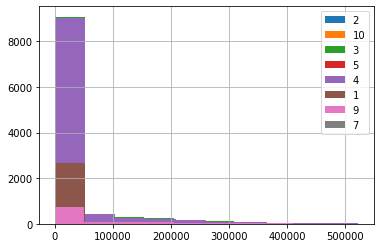

In [47]:
for source in buyers['source_id'].unique():
    current_data = buyers[buyers['source_id']==source]
    time_to_by_source = (current_data['first_order_ts'] - current_data['acquisitions_ts']).dt.total_seconds() / 60
    time_to_by_source.hist(bins=10, label=source)
    plt.legend()
    print('Среднее время с первой сессии до покупки для пользователей источника трафика',source,\
          'в минутах составляет:', time_to_by_source.median())

быстрее всего покупают люди, привлекаемые первым источником трафика
медленнее всего - из 9

для расчета показателя сколько раз пользователи покупают за период, разделим число сессий на количество пользователей за период

In [48]:
orders['buy_ts_month'] = orders['buy_ts'].astype('datetime64[M]')
count_purchases = orders.groupby('buy_ts_month').agg({'revenue':['count','sum']}).reset_index()
count_purchases.columns = ['buy_ts_month','count','sum']
count_purchases.head(10)

,buy_ts_month,count,sum
0,2017-06-01,2354,9557.49
1,2017-07-01,2363,12539.47
2,2017-08-01,1807,8758.78
3,2017-09-01,3387,18345.51
4,2017-10-01,5679,27987.70
5,2017-11-01,5659,27069.93
6,2017-12-01,6218,36388.60
7,2018-01-01,4721,19417.13
8,2018-02-01,5281,25560.54
9,2018-03-01,5326,28834.59


In [49]:
orders['buy_ts_month'] = orders['buy_ts'].astype('datetime64[M]')
count_purchases = orders.groupby('buy_ts_month').agg({'revenue':['count','sum']}).reset_index()
count_purchases.columns = ['buy_ts_month','count','sum']
count_purchases.head(10)

,buy_ts_month,count,sum
0,2017-06-01,2354,9557.49
1,2017-07-01,2363,12539.47
2,2017-08-01,1807,8758.78
3,2017-09-01,3387,18345.51
4,2017-10-01,5679,27987.70
5,2017-11-01,5659,27069.93
6,2017-12-01,6218,36388.60
7,2018-01-01,4721,19417.13
8,2018-02-01,5281,25560.54
9,2018-03-01,5326,28834.59


<function matplotlib.pyplot.show(*args, **kw)>

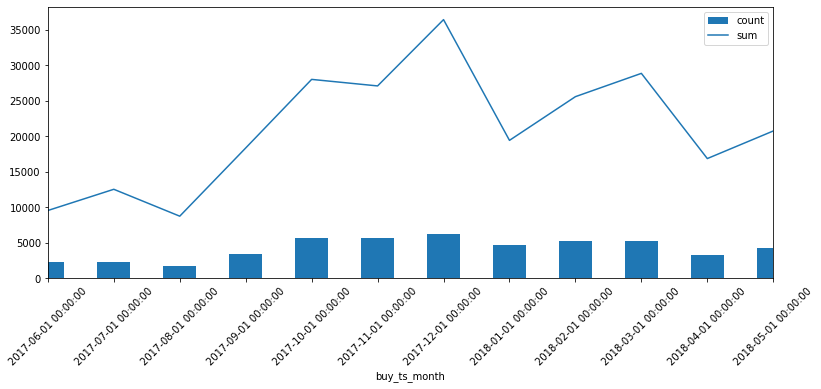

In [50]:
ax = count_purchases[['buy_ts_month', 'count']].plot(x='buy_ts_month', y = 'count', kind= 'bar', figsize=[13,5])
count_purchases[['buy_ts_month', 'sum']].plot(y='sum', linestyle='-', ax=ax)
plt.xticks(rotation=45)
plt.show

в декабре 2017 года была максимальная выручка по сумме всех покупок и по количеству заказов 

Посмотрим,сколько раз пользователи покупают за период по типам устройств и источникам трафика

для каждой пары месяц-посетитель сделаем группировку с первым устройством и источником, из которого пришел пользователь и 
посчитаем выручку

In [51]:
count_purchases_group = visits.groupby(['session_period','uid']).agg({'source_id':'first','device':'first'}).reset_index() 
count_purchases_group.columns = ['buy_ts_month','uid','source_id','device']
count_purchases_buyers = pd.merge(orders,count_purchases_group, on=['uid','buy_ts_month'], how='right')


посчитаем сколько раз пользователи покупают за период по типам устройств

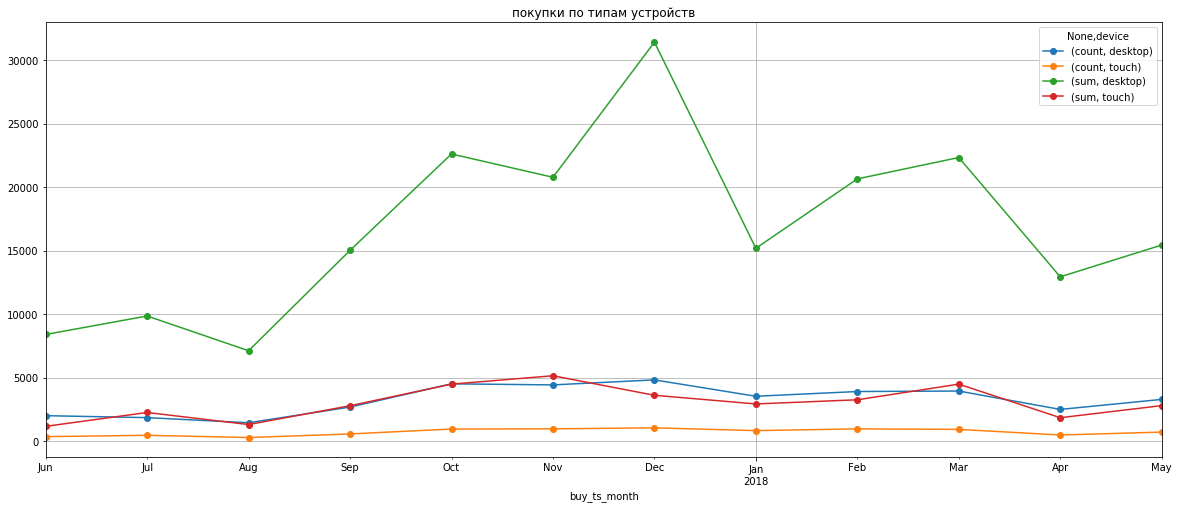

In [52]:
count_purchases_buyers_d = count_purchases_buyers.groupby(['buy_ts_month','device']).agg({'revenue':['count','sum']}).reset_index()
count_purchases_buyers_d.columns = ['buy_ts_month','device','count','sum']
count_purchases_buyers_d.pivot_table(index=['buy_ts_month'],columns='device')\
.plot(grid=True, figsize=(20,8),title='покупки по типам устройств',style='o-')

по количеству и сумме покупок в динамике лидируют десктопные пользователи

проанализируем аналогичный показатель по источникам трафика

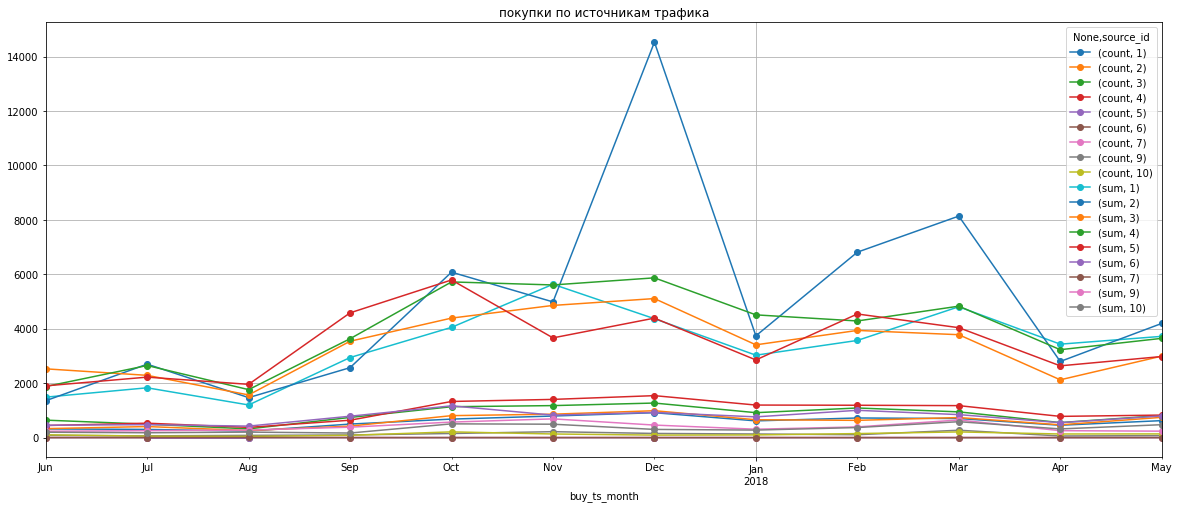

In [53]:
count_purchases_buyers_s = count_purchases_buyers.groupby(['buy_ts_month','source_id']).agg({'revenue':['count','sum']}).reset_index()
count_purchases_buyers_s.columns = ['buy_ts_month', 'source_id','count','sum']
count_purchases_buyers_s.pivot_table(index=['buy_ts_month'],columns='source_id')\
.plot(grid=True, figsize=(20,8),title='покупки по источникам трафика',style='o-')

больше всего заказов по источнику трафика 1, сумма покупок по источнику трафика 5

<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> Всё структурно и наглядно

вычислим средний чек - для этого выручку разделим на количество покупателей

In [54]:
grouped_orders = orders.pivot_table(index='buy_ts_month', aggfunc={'revenue':'sum','uid':'nunique'}).rename(columns={'uid':'buyers'})
grouped_orders['mean_buyer_check'] = grouped_orders['revenue'] / grouped_orders['buyers']
grouped_orders

,revenue,buyers,mean_buyer_check
buy_ts_month,,,
2017-06-01,9557.49,2023,4.724414
2017-07-01,12539.47,1984,6.320297
2017-08-01,8758.78,1472,5.950258
2017-09-01,18345.51,2750,6.671095
2017-10-01,27987.70,4675,5.986674
2017-11-01,27069.93,4547,5.953360
2017-12-01,36388.60,4942,7.363132
2018-01-01,19417.13,3898,4.981306
2018-02-01,25560.54,4258,6.002945


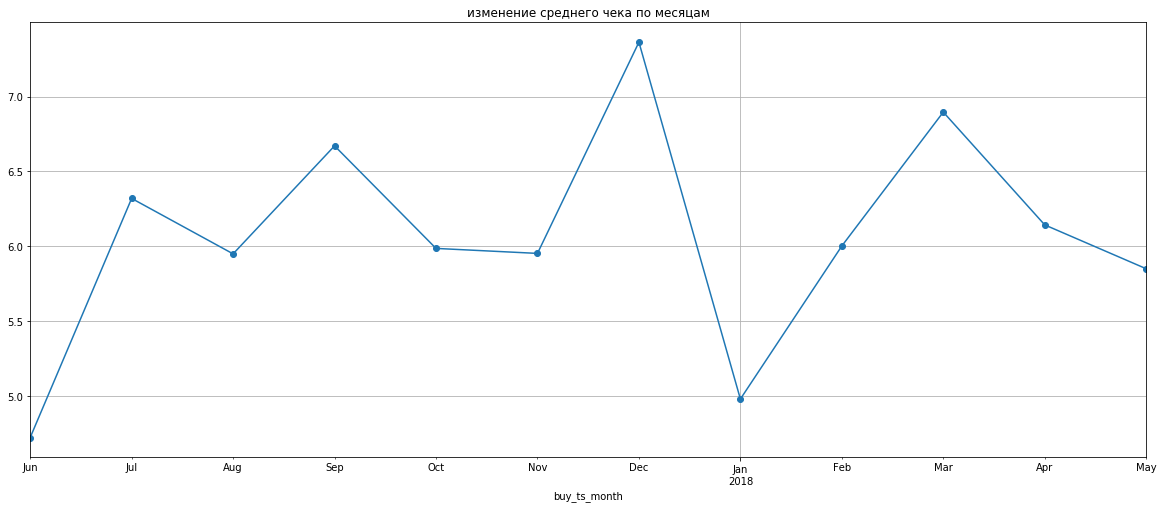

In [55]:
grouped_orders['mean_buyer_check'].plot(grid=True, figsize=(20,8),title='изменение среднего чека по месяцам',style='o-')

самый большой средний чек в декабре 2017 года

In [56]:
grouped_orders['revenue_per_user'] = grouped_orders['revenue'] / grouped_orders['buyers']
average_check = grouped_orders['revenue_per_user'].mean()
print("Средний чек за все время выборки составляет {}".format(int(average_check)))

Средний чек за все время выборки составляет 6


посчитаем средний чек по видам устройств

Средний чек для пользователей с типом устройств desktop в $ составляет: 5
Средний чек для пользователей с типом устройств touch в $ составляет: 4


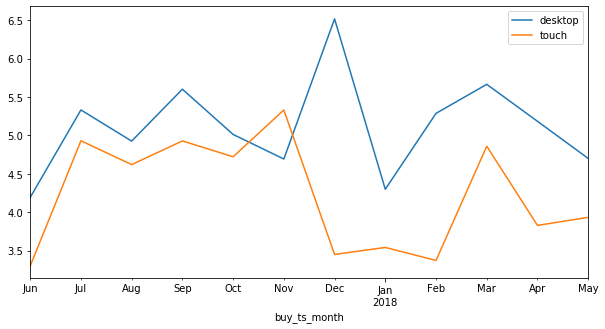

In [57]:
for device in count_purchases_buyers['device'].unique():
    current_data = count_purchases_buyers[count_purchases_buyers['device']== device]
    buyers_check = current_data.groupby('buy_ts_month').agg({'revenue':['count','sum']})
    buyers_check.columns = ['count','sum']
    average_check = buyers_check['sum'] / buyers_check['count']
    average_check.plot(figsize=(10,5), label=device)
    plt.legend()
  
    print('Средний чек для пользователей с типом устройств',device,\
          'в $ составляет:', int(average_check.mean()))

Средний чек для пользователей с типом устройств 1 в $ составляет: 5.84
Средний чек для пользователей с типом устройств 2 в $ составляет: 7.5
Средний чек для пользователей с типом устройств 3 в $ составляет: 4.11
Средний чек для пользователей с типом устройств 5 в $ составляет: 4.6
Средний чек для пользователей с типом устройств 4 в $ составляет: 4.33


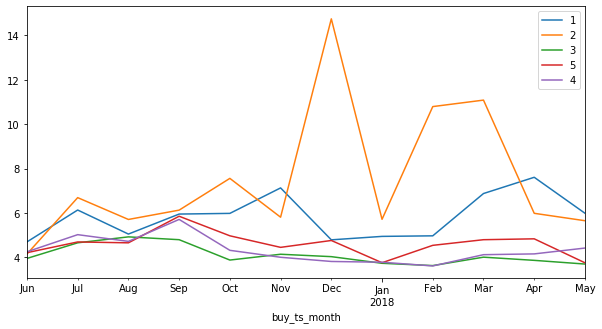

In [58]:
count_purchases_buyers = count_purchases_buyers[count_purchases_buyers['source_id'] <=5]
for source in count_purchases_buyers['source_id'].unique():
    current_data = count_purchases_buyers[count_purchases_buyers['source_id']== source]
    buyers_check = current_data.groupby('buy_ts_month').agg({'revenue':['count','sum']})
    buyers_check.columns = ['count','sum']
    average_check = buyers_check['sum'] / buyers_check['count']
    average_check.plot(figsize=(10,5), label=source)
    plt.legend()
  
    print('Средний чек для пользователей с типом устройств',source,\
          'в $ составляет:', average_check.mean().round(2))

Рассчитаем LTV.
LTV удобно считать по когортам. 
Для этого нужно:
найти дату первой покупки каждого покупателя;
вычислить число новых покупателей за каждую дату;
добавить дату первой покупки в таблицу с заказами;
сгруппировать таблицу и посчитать выручку.
Данные за год. 
Удобнее всего сформировать месячные когорты.
А для расчета LTV по устройствам и источникам кагортами будут источники и устройства
Напишем универсальный код

In [59]:
#строим профили юзеров (acquisition приобретение) для расчета LTV используя ранее сформированный дата фрейм с пользователями

users['acquisition_date'] = users['acquisitions_ts'].dt.date
users['acquisition_month'] = users['acquisitions_ts'].astype('datetime64[M]')
users = (users.reset_index()
              .set_index(['source_id','acquisition_date'])
              .join(costs.set_index(['source_id','acquisition_date']), how = 'left'))

#добавляем стоимость приобретения индивидуального пользователя
user_cost = (users.groupby(['source_id','acquisition_date'])
                         .agg({'device':'count', 'costs':'max'})
                        .rename(columns = {'device':'users'}))
user_cost['acquisition_cost'] = user_cost['costs'] / user_cost['users']
users = users.join(user_cost[['acquisition_cost']], how='left').reset_index()
users = users.set_index('uid')[['acquisitions_ts', 'acquisition_date',\
                                'acquisition_month', 'source_id', 'device', 'acquisition_cost']]
#платящий пользователь или нет
users = users.join(orders.groupby('uid').agg({'buy_ts':'min'}).rename(columns = {'buy_ts':'first_purchase_dt'}),how = 'left')
users['payer'] = ~users['first_purchase_dt'].isna()

In [60]:
users.head(10)

,acquisitions_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,first_purchase_dt,payer
uid,,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6,2017-09-11 00:06:00,True
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6,NaT,False
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6,2017-06-01 09:23:00,True
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6,2017-06-01 16:47:00,True
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6,NaT,False
2050423809815667474,2017-06-01 10:36:00,2017-06-01,2017-06-01,1,desktop,1.6,2017-06-01 10:38:00,True
3520273333047097992,2017-06-01 20:08:00,2017-06-01,2017-06-01,1,desktop,1.6,2017-06-01 20:35:00,True
3644482766749211722,2017-06-01 09:22:00,2017-06-01,2017-06-01,1,desktop,1.6,2017-06-01 09:22:00,True
3963367130094376110,2017-06-01 18:07:00,2017-06-01,2017-06-01,1,touch,1.6,2017-06-01 18:07:00,True


In [61]:
#строим кагорты
#исходя из даты первого посещения
#и формируем таблицы для дальнейшего расчета cac и ltv

dimension = ['acquisition_month']
#dimension = ['device']
#dimension_v = ['source_id']

cohorts_u = (users.groupby(dimension)
                  .agg({'payer':'sum','acquisition_cost':'sum'}) #payer:sum суммирует только payer == True
                  .rename(columns = {'payer':'cohorts_size'}))
cohorts_u['cac'] = cohorts_u['acquisition_cost'] / cohorts_u['cohorts_size']
display(cohorts_u)
#считаем LTV
#напишем универсальный алгоритм 

ltv = orders.set_index('uid').join(users, how = 'left')[['acquisition_month', 'buy_ts_month', 'revenue']]
ltv['age_month'] = ((ltv['buy_ts_month'] - ltv['acquisition_month'])/ np.timedelta64(1, 'M')).round().astype('int')
ltv = ltv.groupby(dimension + ['age_month']).agg({'revenue':'sum'})
ltv = pd.pivot_table(ltv, index=dimension, columns = 'age_month', values ='revenue', aggfunc ='sum')
ltv = ltv.cumsum(axis =1)
display(ltv)
ltv = cohorts_u[['cohorts_size']].join(ltv)
ltv = ltv.div(ltv['cohorts_size'], axis=0).drop(columns = ['cohorts_size']) #делим (div) все ячейки в рядах на соответствующую кагорту
itv_consolidated = cohorts_u[['cohorts_size', 'cac']].join(ltv[range(0,6)].fillna('')) #срок окупаемости зададим 6 месяцев
display(itv_consolidated)

romi = cohorts_u[['cohorts_size', 'cac']].join(ltv[range(0,6)])
romi = romi.div(romi['cac'], axis = 0).fillna('')
display(romi)


,cohorts_size,acquisition_cost,cac
acquisition_month,,,
2017-06-01,2923.0,18015.00,6.163189
2017-07-01,2458.0,18230.81,7.416928
2017-08-01,1721.0,14789.17,8.593359
2017-09-01,3058.0,24360.36,7.966109
2017-10-01,4678.0,36322.88,7.764617
2017-11-01,4262.0,37907.88,8.894388
2017-12-01,4074.0,38306.03,9.402560
2018-01-01,3119.0,33518.52,10.746560
2018-02-01,3186.0,32707.71,10.266073


age_month,0,1,2,3,4,5,6,7,8,9,10,11
acquisition_month,,,,,,,,,,,,
2017-06-01,9557.49,12222.07,13686.76,17568.85,21509.44,24333.92,27823.87,30094.68,32412.59,35894.23,38098.24,40026.05
2017-07-01,9874.89,10934.17,12043.07,13026.03,13873.02,14671.10,15259.10,16029.40,16753.92,17344.95,17812.11,NaN
2017-08-01,6234.81,7232.13,8233.48,9179.69,9989.73,10522.63,11009.28,12255.51,13086.15,13461.87,NaN,NaN
2017-09-01,12357.20,16057.68,18168.31,28607.24,29895.72,31805.77,32772.61,33263.99,33682.56,NaN,NaN,NaN
2017-10-01,18362.32,22172.15,23499.17,24557.22,25600.69,26622.88,27201.79,27857.69,NaN,NaN,NaN,NaN
2017-11-01,16531.79,19199.37,20542.22,21911.75,23020.49,23728.12,24426.72,NaN,NaN,NaN,NaN,NaN
2017-12-01,16857.00,18596.03,22794.33,27918.15,29375.72,31157.85,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,10597.01,12548.71,13713.47,14019.35,14546.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,11512.63,13497.09,14160.28,15061.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,cohorts_size,cac,0,1,2,3,4,5
acquisition_month,,,,,,,,
2017-06-01,2923.0,6.163189,3.269754,4.18134,4.68244,6.01055,7.35869,8.32498
2017-07-01,2458.0,7.416928,4.017449,4.4484,4.89954,5.29944,5.64403,5.96871
2017-08-01,1721.0,8.593359,3.622783,4.20228,4.78413,5.33393,5.80461,6.11425
2017-09-01,3058.0,7.966109,4.040942,5.25104,5.94124,9.35489,9.77623,10.4008
2017-10-01,4678.0,7.764617,3.925250,4.73966,5.02334,5.24951,5.47257,5.69108
2017-11-01,4262.0,8.894388,3.878881,4.50478,4.81985,5.14119,5.40134,5.56737
2017-12-01,4074.0,9.402560,4.137703,4.56456,5.59507,6.85276,7.21054,7.64797
2018-01-01,3119.0,10.746560,3.397567,4.02331,4.39675,4.49482,4.66394,
2018-02-01,3186.0,10.266073,3.613506,4.23637,4.44453,4.72734,,


,cohorts_size,cac,0,1,2,3,4,5
acquisition_month,,,,,,,,
2017-06-01,474.267499,1.0,0.530530,0.678439,0.759742,0.975235,1.19397,1.35076
2017-07-01,331.404035,1.0,0.541659,0.599763,0.660589,0.714506,0.760966,0.804742
2017-08-01,200.270942,1.0,0.421579,0.489015,0.556724,0.620704,0.675476,0.711509
2017-09-01,383.876265,1.0,0.507267,0.659173,0.745815,1.17434,1.22723,1.30564
2017-10-01,602.476566,1.0,0.505530,0.610418,0.646952,0.676081,0.704809,0.732951
2017-11-01,479.178577,1.0,0.436104,0.506474,0.541898,0.578026,0.607275,0.625942
2017-12-01,433.286248,1.0,0.440061,0.48546,0.595059,0.728819,0.766869,0.813393
2018-01-01,290.232415,1.0,0.316154,0.374381,0.409131,0.418257,0.433994,
2018-02-01,310.342607,1.0,0.351985,0.412658,0.432934,0.460481,,


в горизонте окупаемости 6 месяцев кагорта пользователей, совершивших первую сессию в сентябре 2017 года принесла больше всего выручки на одного пользоватея (средний показатель) в размере 10 долларов.
Пользователи кагорт с датой регистрации позже декабря 2017 года еще не показали LTV на 6 месяц жизни
Если рассмотреть пользователей в периоде, в который попадает большинство кагорт (возьмем 3 месяц жизни), пользователи все той же кагорты показывают самый высокий LTV 5.9 доллара на пользователя
затраты по когортам:
больше всего (в среднем 11.7 долларов) потрачено на привлечение пользователей из кагорты "2018-04-01" (пользователи с датой первой сесии в апреле 2018г)
проверим окупаемость кагорт (по признаку LTV > CAC)
окупились кагорты (по сроку окупаемости 6 месяцев):
2017-06-01 пользователи с датой первой сессии в июне 2017года
2017-09-01 пользователи с датой первой сессии в сентябре 2017года
По окупаемости:
видим негативныее тендаенции по окупаемости на третий месяц жизни не окупилась ни одна из кагорт (со сроком жизни от 3 месяцев)
из всех кагорт окупились только две кагорты:
2017-06-01 на 5 месяц жизни
2017-09-01 на 4 месяц жизни


In [62]:
dimension = ['device']
#dimension_v = ['source_id']

cohorts_u = (users.groupby(dimension)
                  .agg({'payer':'sum','acquisition_cost':'sum'}) #payer:sum суммирует только payer == True
                  .rename(columns = {'payer':'cohorts_size'}))
cohorts_u['cac'] = cohorts_u['acquisition_cost'] / cohorts_u['cohorts_size']
display(cohorts_u)
#считаем LTV
#напишем универсальный алгоритм 

ltv = orders.set_index('uid').join(users, how = 'left')[['acquisition_month', 'buy_ts_month', 'revenue'] + dimension]
ltv['age_month'] = ((ltv['buy_ts_month'] - ltv['acquisition_month'])/ np.timedelta64(1, 'M')).round().astype('int')
ltv = ltv.groupby(dimension + ['age_month']).agg({'revenue':'sum'})
ltv = pd.pivot_table(ltv, index=dimension, columns = 'age_month', values ='revenue', aggfunc ='sum')
ltv = ltv.cumsum(axis =1)
display(ltv)
ltv = cohorts_u[['cohorts_size']].join(ltv)
ltv = ltv.div(ltv['cohorts_size'], axis=0).drop(columns = ['cohorts_size']) #делим (div) все ячейки в рядах на соответствующую кагорту
itv_consolidated = cohorts_u[['cohorts_size', 'cac']].join(ltv[range(0,6)].fillna('')) #срок окупаемости зададим 6 месяцев
display(itv_consolidated)

romi = cohorts_u[['cohorts_size', 'cac']].join(ltv[range(0,6)])
romi = romi.div(romi['cac'], axis = 0).fillna('')
display(romi)


,cohorts_size,acquisition_cost,cac
device,,,
desktop,29210.0,235065.750929,8.047441
touch,7312.0,94000.729071,12.855680


age_month,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,117165.49,135604.46,148616.25,172014.47,181781.58,190166.86,196116.10,200371.23,203701.28,207242.06,209628.25,211326.35
touch,25142.97,30100.99,32245.66,33855.92,35112.16,36304.34,37164.05,38343.54,39305.13,40212.74,40497.72,40727.43


,cohorts_size,cac,0,1,2,3,4,5
device,,,,,,,,
desktop,29210.0,8.047441,4.011143,4.642398,5.087855,5.888890,6.223265,6.510334
touch,7312.0,12.855680,3.438590,4.116656,4.409964,4.630186,4.801991,4.965036


,cohorts_size,cac,0,1,2,3,4,5
device,,,,,,,,
desktop,3629.725286,1.0,0.498437,0.576879,0.632233,0.731772,0.773322,0.808994
touch,568.775844,1.0,0.267476,0.320221,0.343036,0.360167,0.373531,0.386213


пользователи с типом устройств "десктоп" показывают более высокий LTV (6.5 доллара на одного пользователя), чем пользователи мобильных устройств (4.96 долларов на одного юзера).
При этом, затраты на привлечение десктопных пользователей ниже, чем пользователей мобильных устройств
В целом, пользователи не окупаются за шесть месяцев (LTV < CAC), ROI <1

In [63]:
dimension = ['source_id']

cohorts_u = (users.groupby(dimension)
                  .agg({'payer':'sum','acquisition_cost':'sum'}) #payer:sum суммирует только payer == True
                  .rename(columns = {'payer':'cohorts_size'}))
cohorts_u['cac'] = cohorts_u['acquisition_cost'] / cohorts_u['cohorts_size']
display(cohorts_u)
#считаем LTV
#напишем универсальный алгоритм 

ltv = orders.set_index('uid').join(users, how = 'left')[['acquisition_month', 'buy_ts_month', 'revenue'] + dimension]
ltv['age_month'] = ((ltv['buy_ts_month'] - ltv['acquisition_month'])/ np.timedelta64(1, 'M')).round().astype('int')
ltv = ltv.groupby(dimension + ['age_month']).agg({'revenue':'sum'})
ltv = pd.pivot_table(ltv, index=dimension, columns = 'age_month', values ='revenue', aggfunc ='sum')
ltv = ltv.cumsum(axis =1)
display(ltv)
ltv = cohorts_u[['cohorts_size']].join(ltv)
ltv = ltv.div(ltv['cohorts_size'], axis=0).drop(columns = ['cohorts_size']) #делим (div) все ячейки в рядах на соответствующую кагорту
itv_consolidated = cohorts_u[['cohorts_size', 'cac']].join(ltv[range(0,6)].fillna('')) #срок окупаемости зададим 6 месяцев
display(itv_consolidated)

romi = cohorts_u[['cohorts_size', 'cac']].join(ltv[range(0,6)])
romi = romi.div(romi['cac'], axis = 0).fillna('')
display(romi)


,cohorts_size,acquisition_cost,cac
source_id,,,
1,2899.0,20833.27,7.186364
2,3506.0,42806.04,12.209367
3,10473.0,141321.63,13.493901
4,10295.0,61073.60,5.932356
5,6931.0,51756.40,7.467378
6,0.0,0.00,NaN
7,1.0,0.00,0.000000
9,1088.0,5454.42,5.013254
10,1329.0,5821.12,4.380075


age_month,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,14526.97,17140.96,18936.48,21671.35,23363.34,24477.57,25411.97,27620.09,28872.82,29742.26,30565.89,31090.55
2,17905.40,23964.41,30010.57,36507.70,39701.27,42175.52,43396.17,44177.89,44929.65,45882.69,46538.18,46923.61
3,37710.74,43624.93,46099.83,48337.15,50325.60,51704.48,52776.81,53356.70,53870.06,54165.19,54361.36,54511.24
4,37452.58,41906.05,44031.49,46112.41,47875.93,50025.23,52105.81,52819.94,53770.22,55136.24,55931.01,56693.41
5,28782.52,32204.98,34220.09,45093.00,46849.89,49004.13,50156.47,51081.77,51624.99,52408.14,52543.20,52624.02
7,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2374.56,3005.58,3577.62,4086.23,4543.02,4769.16,5046.23,5245.72,5521.73,5685.65,5743.88,5759.40
10,3554.47,3857.32,3984.61,4061.33,4233.47,4313.89,4385.47,4411.44,4415.72,4433.41,4441.23,4450.33


,cohorts_size,cac,0,1,2,3,4,5
source_id,,,,,,,,
1,2899.0,7.186364,5.01103,5.91271,6.53207,7.47546,8.0591,8.44345
2,3506.0,12.209367,5.10707,6.83526,8.55977,10.4129,11.3238,12.0295
3,10473.0,13.493901,3.60076,4.16547,4.40178,4.61541,4.80527,4.93693
4,10295.0,5.932356,3.63794,4.07052,4.27698,4.47911,4.65041,4.85918
5,6931.0,7.467378,4.15272,4.64651,4.93725,6.50599,6.75947,7.07028
6,0.0,NaN,,,,,,
7,1.0,0.000000,1.22,,,,,
9,1088.0,5.013254,2.1825,2.76248,3.28825,3.75573,4.17557,4.38342
10,1329.0,4.380075,2.67454,2.90242,2.9982,3.05593,3.18546,3.24597


,cohorts_size,cac,0,1,2,3,4,5
source_id,,,,,,,,
1,403.403,1,0.697297,0.822769,0.908954,1.04023,1.12144,1.17493
2,287.157,1,0.418291,0.559837,0.701083,0.852863,0.927469,0.98527
3,776.128,1,0.266843,0.308693,0.326205,0.342036,0.356107,0.365864
4,1735.4,1,0.613237,0.686157,0.720958,0.75503,0.783905,0.819097
5,928.17,1,0.556115,0.622242,0.661176,0.871255,0.9052,0.946823
6,,,,,,,,
7,inf,,inf,,,,,
9,217.025,1,0.435346,0.551036,0.655912,0.749159,0.832906,0.874366
10,303.419,1,0.610616,0.662642,0.684509,0.697689,0.72726,0.741076


самый высокий LTV по второму источнику трафика
самые высокие затраты на привлечение по 3 источнику трафика
Окупился только 1 источник трафика
Сроку окупаемости составил 4 месяц
2 и 5 источник трафика на грани окупаемости
3 источник трафика сильно убыточный - CAC значительно выше, чем LTV

<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> Здесь всё хорошо

Анализиуем блок маркетинг
Сколько денег потратили? Всего / на каждый источник / по времени
Сколько стоило привлечение одного покупателя из каждого источника?
На сколько окупились расходы? (ROI)

Оценим общие затраты

In [64]:
costs_total = costs['costs'].sum()
print("Общая сумма затрат за весь период составила", int(costs_total), "$")

Общая сумма затрат за весь период составила 329131 $


In [65]:
costs.head(10)

,source_id,acquisition_date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


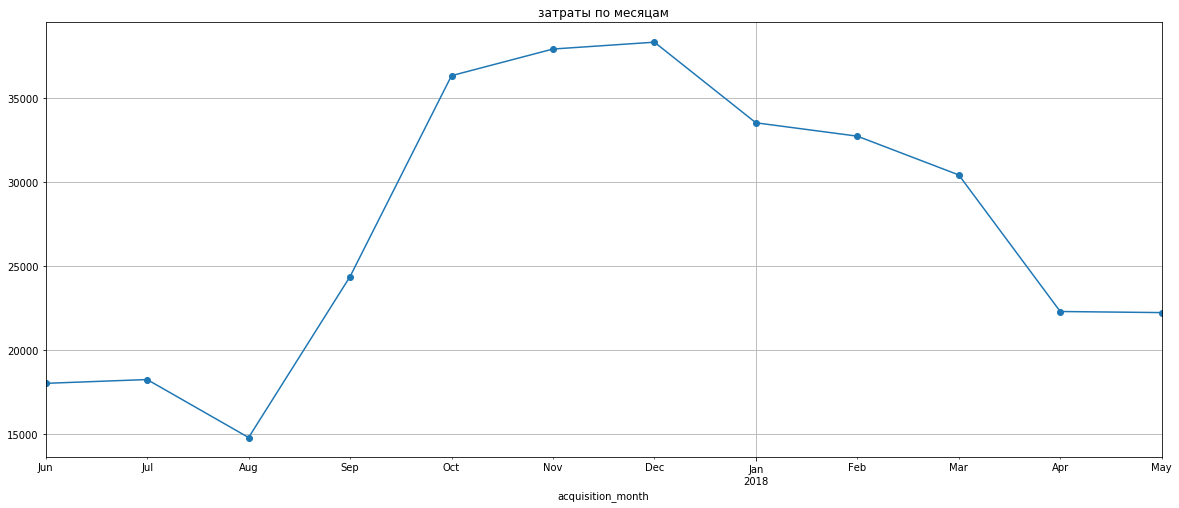

In [66]:
#считаем расходы за месяц
costs['acquisition_month'] = costs['acquisition_date'].astype('datetime64[M]')
monthly_costs = costs.groupby('acquisition_month')['costs'].sum()
monthly_costs.plot(grid=True, figsize=(20,8),style='o-', title='затраты по месяцам')

Больше всего затрат на привлечение новых пользователей было в декаре 2017года

Общие рекомендации по проекту.
1. формировать рекламный бюджет, исходя из сезонности использования платформы.
Начинать активно привлекать новых пользователей в сентябре, в таком случае примерно к декабрю они должны окупитья.
2. рекомендуемый источник трафика 1.
Сделать акцент на привлечение более качественнрого трафика, скоратив источники, по которым большие затраты и низкая окупаемость
Однозначно 3 источник
3. проверить насколько удобна в использовании мобильная версия.